In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML

In [5]:
heart_prev = pd.read_csv("heart_disease_restaurant.csv")
heart_prev.drop("Unnamed: 0", axis=1, inplace=True)
display(heart_prev.head())
display(heart_prev.info())

,Zip Code,Smoking Prevalence,Hypertension Prevalence,Obesity Prevalence,Sedentarism Prevalence,Cholesterol Prevalence,Diabetes Prevalence,Heart Disease Prevalence,Restaurant Count,median_household_income,Population,Population Group,Restaurant Group
0,1101,28.300000,36.400000,44.000000,46.600000,41.300000,19.300000,9.300000,2.0,NaN,NaN,NaN,NaN
1,1104,24.269272,33.257045,37.437441,37.721353,38.392990,14.837576,8.816472,5.0,32273.0,22865.0,20000-40000,0-7
2,1105,28.596151,32.879892,42.176132,43.694299,37.409454,15.840128,7.849705,4.0,18402.0,12350.0,<20000,0-7
3,1107,25.495498,31.912761,41.052003,44.608772,38.631033,16.712049,8.234889,1.0,21737.0,11611.0,<20000,0-7
4,1108,23.351695,29.923640,34.742488,33.123923,35.242800,12.185663,6.873862,2.0,34064.0,26688.0,20000-40000,0-7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4796 entries, 0 to 4795
Data columns (total 13 columns):
Zip Code                    4796 non-null int64
Smoking Prevalence          4796 non-null float64
Hypertension Prevalence     4796 non-null float64
Obesity Prevalence          4796 non-null float64
Sedentarism Prevalence      4796 non-null float64
Cholesterol Prevalence      4796 non-null float64
Diabetes Prevalence         4796 non-null float64
Heart Disease Prevalence    4796 non-null float64
Restaurant Count            4796 non-null float64
median_household_income     4400 non-null float64
Population                  4400 non-null float64
Population Group            4400 non-null object
Restaurant Group            4400 non-null object
dtypes: float64(10), int64(1), object(2)
memory usage: 487.2+ KB


None

In [6]:
heart_prev=heart_prev.fillna(heart_prev.mean(axis=0))
heart_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4796 entries, 0 to 4795
Data columns (total 13 columns):
Zip Code                    4796 non-null int64
Smoking Prevalence          4796 non-null float64
Hypertension Prevalence     4796 non-null float64
Obesity Prevalence          4796 non-null float64
Sedentarism Prevalence      4796 non-null float64
Cholesterol Prevalence      4796 non-null float64
Diabetes Prevalence         4796 non-null float64
Heart Disease Prevalence    4796 non-null float64
Restaurant Count            4796 non-null float64
median_household_income     4796 non-null float64
Population                  4796 non-null float64
Population Group            4400 non-null object
Restaurant Group            4400 non-null object
dtypes: float64(10), int64(1), object(2)
memory usage: 487.2+ KB


## Analysis of the Data

The data is split into the target variable, heart disease prevalence (y), and its features (X).

We will use various untuned supervised learning estimators to see which works best by default. We will then tune the top-performing estimators. The metric used for performance will be RMSE and 5-fold cross-validation with be performed.

Training will be performed using 80% of the data, and 20% will be reserved for final evaluation of the model.

In [7]:
# Import split, cross validation, imputer and pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [8]:
X = heart_prev.drop(['Zip Code', 'Heart Disease Prevalence','Restaurant Count','Population Group','Restaurant Group'], axis = 1)
y = heart_prev['Heart Disease Prevalence'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=42)

In [9]:
df = heart_prev.drop(['Zip Code', 'Heart Disease Prevalence','Restaurant Count','Population Group','Restaurant Group'], axis = 1)

In [10]:
X_train.shape,y_train.shape

((3836, 8), (3836,))

In [11]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
model = lm.fit(X_train, y_train)

In [12]:
cv_scores= cross_val_score(lm, X_train, y_train, cv=5,scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores* -1 )
reg_scr=np.mean(cv_scores)
reg_scr
print("\nAverage Score on 5-Folds: ", reg_scr)


Average Score on 5-Folds:  0.6474985037591783


In [13]:
predictions = cross_val_predict(lm,df,y, cv=5)
accuracy = metrics.r2_score(y,predictions)
print("Accuracy Cv ", accuracy)

Accuracy Cv  0.8755660748906611


### Decision Tree Regressor

In [14]:
from sklearn import tree
dt= tree.DecisionTreeRegressor(max_depth=6,random_state=42)
clf = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [15]:
cv_scores= cross_val_score(dt, X_train, y_train, cv=5,scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores* -1 )
dt_src=np.mean(cv_scores)
print("\nAverage Score on 5-Folds of Decision Tree: ", dt_src)


Average Score on 5-Folds of Decision Tree:  0.7038938447341189


In [16]:
predictions = cross_val_predict(dt,df,y, cv=5)
accuracy = metrics.r2_score(y,predictions)
print("Accuracy Cv of Decision Tree", accuracy)


Accuracy Cv of Decision Tree 0.8500642714882691


### Random Forest Regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [18]:
cv_scores= cross_val_score(rfr, X_train, y_train, cv=5,scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores* -1 )
rfg_scr=np.mean(cv_scores)
print("\nAverage Score on 5-Folds of Random Forest: ", rfg_scr)


Average Score on 5-Folds of Random Forest:  0.6043216206837974


In [19]:
predictions = cross_val_predict(rfr,df,y, cv=5)
accuracy = metrics.r2_score(y,predictions)
print("Accuracy Cv of Random Forest:", accuracy)

Accuracy Cv of Random Forest: 0.8762067574620632


### Adaptive Boost

In [22]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor(n_estimators=100, base_estimator=dt,learning_rate=1,random_state=42)
clf = adb.fit(X_train,y_train)

In [23]:
cv_scores= cross_val_score(adb, X_train, y_train, cv=5,scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores* -1 )
adb_scr=np.mean(cv_scores)
print("\nAverage Score on 5-Folds of Adaptive Boost Regressor: ", adb_scr)


Average Score on 5-Folds of Adaptive Boost Regressor:  0.6031027256927415


In [24]:
predictions = cross_val_predict(adb,df,y, cv=5)
accuracy = metrics.r2_score(y,predictions)
print("Accuracy Cv of Adaptive Boost Regressor:", accuracy)

Accuracy Cv of Adaptive Boost Regressor: 0.8834795679900951


### Gradient Boost Regressor

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
cv_scores= cross_val_score(gb, X_train, y_train, cv=5,scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores* -1 )
gbr_src=np.mean(cv_scores)
print("\nAverage Score on 5-Folds of Gradient Boost Regressor: ", gbr_src)


Average Score on 5-Folds of Gradient Boost Regressor:  0.5821800097297372


In [27]:
predictions = cross_val_predict(gb,df,y, cv=5)
accuracy = metrics.r2_score(y,predictions)
print("Accuracy Cv of Gradient Boost Regressor:", accuracy)

Accuracy Cv of Gradient Boost Regressor: 0.8892577827811858


### Summary of un-tuned scores

A gradient boost regressor had the best default performance at 0.582 RMSE. The random forest performed similarly well at 0.604 RMSE. Both estimators should be evaluated for improved performance through tuning.

In [28]:
cv_model = pd.DataFrame({'Model':['LinearRegression','DecisionTree','RandomForest','AdaptiveBoost','GradientBoost'],
                      'Score':[reg_scr,dt_src,rfg_scr,adb_scr,gbr_src]})
cv_model.sort_values(by='Score',ascending=True)

,Model,Score
4,GradientBoost,0.582180
3,AdaptiveBoost,0.603103
2,RandomForest,0.604322
0,LinearRegression,0.647499
1,DecisionTree,0.703894


### Hyperparamenter Tuning

### Tuned Gradient Boost Regression

In [29]:
from sklearn.model_selection import GridSearchCV
p_test3 = { 'n_estimators':[100,200,500],'max_depth': [3,5]}
tuning = GridSearchCV(estimator =GradientBoostingRegressor(random_state=42),param_grid =p_test3,
                     verbose=100,scoring="neg_mean_squared_error",cv=5)
tuning.fit(X_train,y_train)



Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=3, n_estimators=100 ...................................
[CV] ...... max_depth=3, n_estimators=100, score=-0.340, total=   0.4s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] ...... max_depth=3, n_estimators=100, score=-0.298, total=   0.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] ...... max_depth=3, n_estimators=100, score=-0.370, total=   0.3s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] ...... max_depth=3, n_estimators=100, score=-0.386, total=   0.4s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [30]:
cv_param = tuning.best_params_
cv_score = np.sqrt(tuning.best_score_ * -1)

print("Best parameters:\n---------------")
for k,v in cv_param.items():
    print(k,": ",v)
print("\nBest score: ", cv_score)


Best parameters:
---------------
max_depth :  5
n_estimators :  100

Best score:  0.5699548443231076


In [31]:
best_est = GradientBoostingRegressor(p_test3)
best_est.n_estimators

100

### Feature importance

Now we examine which features provide the most predictive value for the model using Mutual Information scoring

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
best_k = SelectKBest(score_func=mutual_info_regression, k=8).fit(X_train,y_train)
#best_k.fit(X_train,y_train)  
#best_k.scores_
feature_names = X.columns
feature_scores = list(zip(feature_names, best_k.scores_))
feature_scores

[('Smoking Prevalence', 0.24555527308853442),
 ('Hypertension Prevalence', 0.8960500601611407),
 ('Obesity Prevalence', 0.2936552949941156),
 ('Sedentarism Prevalence', 0.3663981216032903),
 ('Cholesterol Prevalence', 0.902455526526535),
 ('Diabetes Prevalence', 0.8245541363847018),
 ('median_household_income', 0.3087819185098635),
 ('Population', 0.11137629848506059)]

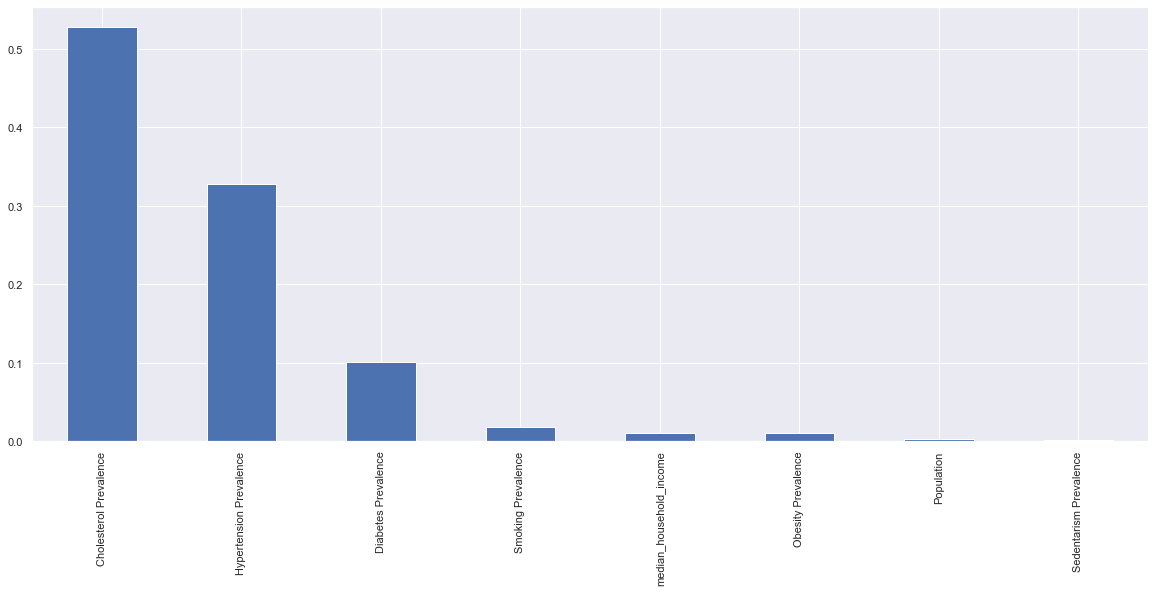

In [56]:
feature_imp = pd.Series(gb.feature_importances_,X_train.columns).sort_values(ascending=False)
feature_imp.plot.bar(figsize=(20,8))
#sns.barplot(feature_imp, palette="Reds_r")

### Q. In above graph Sedentarism Prevalence feature is coming at last but in below graph it has good impact. So which method should i use ?

In [34]:
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.24594455, 0.89434706, 0.29360139, 0.36655772, 0.90208248,
       0.82384869, 0.30895076, 0.11556321])

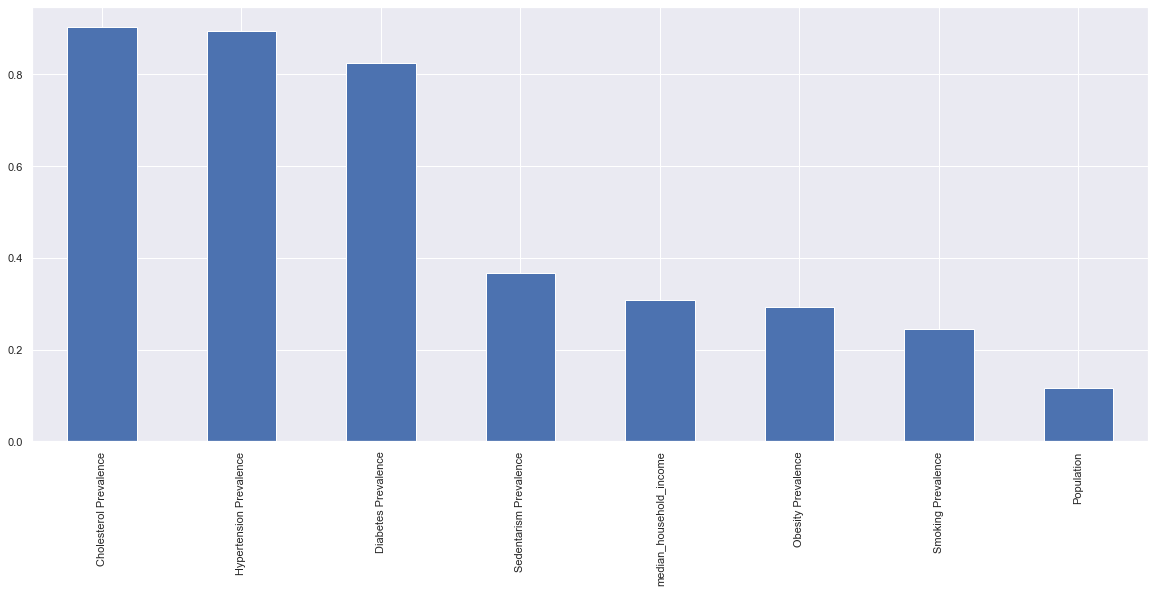

In [58]:
mi_series = pd.Series(mutual_info)
mi_series.index = X_train.columns
feature = mi_series.sort_values(ascending=False)
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [59]:
feature

Cholesterol Prevalence     0.902082
Hypertension Prevalence    0.894347
Diabetes Prevalence        0.823849
Sedentarism Prevalence     0.366558
median_household_income    0.308951
Obesity Prevalence         0.293601
Smoking Prevalence         0.245945
Population                 0.115563
dtype: float64

In [36]:
k_best_features = SelectKBest(score_func=mutual_info_regression, k=8).fit(X_train,y_train)
print('Selected top 10 features: {}'.format(X_train.columns[k_best_features.get_support()]))

Selected top 10 features: Index(['Smoking Prevalence', 'Hypertension Prevalence', 'Obesity Prevalence',
       'Sedentarism Prevalence', 'Cholesterol Prevalence',
       'Diabetes Prevalence', 'median_household_income', 'Population'],
      dtype='object')


### Final Results

In [37]:
model_gbr = GradientBoostingRegressor(n_estimators=100,max_depth=5 ,random_state=42)
model_gbr.fit(X_train,y_train)
pred_train=model_gbr.predict(X_train)
pred_test =model_gbr.predict(X_test)
train_score = model_gbr.score(X_train,y_train)
train_rmse = np.sqrt(mean_squared_error(y_train,pred_train))
print("Training set R2: {}".format(train_score*100))
print("Training set RMSE: {}".format(train_rmse))

Training set R2: 96.31225581269929
Training set RMSE: 0.3651638059110139


In [38]:
test_score = model_gbr.score(X_test,y_test)
test_rmse = np.sqrt(mean_squared_error(y_test,pred_test))
test_score,test_rmse
print("Training set R2: {}".format(test_score*100))
print("Training set RMSE: {}".format(test_rmse))

Training set R2: 90.44310433714091
Training set RMSE: 0.6274457889055144
